In [36]:
using JLD2, UnPack
using Plots, ColorSchemes, LaTeXStrings
using Statistics
using Measurements: Measurements, value

In [3]:
# create folder for .pdf plots if it doesn't already exist
dn = "./plot_outputs/"
isdir(dn) || mkdir(dn)

# uncomment to delete all .pdf files already in the directory
# for fn in readdir(dn)
#     if fn[end-3:end] == ".pdf"
#         rm(dn*fn)
#     end
# end

sz = (400,300)
scaling_double = 1.7
scaling_single = 1.4

Plots.default(
    fontfamily = "Computer Modern",
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 1.5,
    msc = :auto,
    size = sz,
    markersize = 3
)

myblue = theme_palette(:auto)[1]
myred = theme_palette(:auto)[2];

## Glauber reciprocal 

### Autocovariance

In [15]:
data = load("../data/glauber_autocovariance_para.jld2")
@unpack J, h, β, k, d, c_bp, maxdist = data;
J_bp, h_bp, β_bp, k_bp = J, h, β, k

data = load("../data/glauber_autocovariance_para_montecarlo2.jld2")
@unpack J, h, β, k, Ns, c, T, nsamples = data

@assert J == J_bp && h == h_bp && β == β_bp && k == k_bp

println("Bond dimension: d=", d, ". N montecarlo samples: ", nsamples);

Bond dimension: d=10. N montecarlo samples: 10000


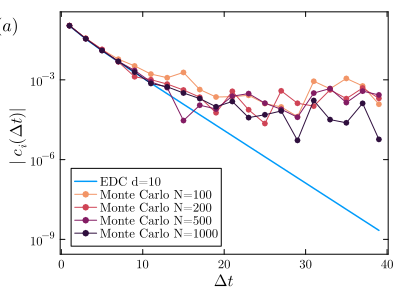

In [16]:
only_even = true
step = only_even + 1
c_bp_plot = c_bp[step:step:end]
pl1 = plot(1:step:maxdist, c_bp_plot, label="EDC d=$d")
plot!(pl1; xlabel=L"\Delta t", size=(400,300),
    # ylabel=L"\langle \sigma_i^t\sigma_i^{t+\Delta t}\rangle - \langle \sigma_i^t\rangle\langle\sigma_i^{t+\Delta t}\rangle")
    ylabel=L"|c_i({\Delta t})|")
t = T - maxdist + 1
Ns_plot = Ns[1:end-1]
cg = cgrad(:matter, length(Ns_plot)+1, categorical=true)
for a in eachindex(Ns_plot)
    N = Ns_plot[a]
    c_mc = c[a]
    c_mc_plot = map(x -> x<0 ? eltype(c_mc)(NaN) : x, c_mc[t,t+step:step:end])
    c_mc_plot = abs.(c_mc[t,t+step:step:end])
    plot!(pl1, 1:step:maxdist, value.(c_mc_plot), c=cg[a+1], msc=cg[a+1],
        label="Monte Carlo N=$N", m=:o, yaxis=:log10, legend=:bottomleft,
        ylims = extrema(c_bp_plot) .* (2.0 .^ (-1,1)), lw=1)
end

plot!(pl1, ylims=(5e-10, 2e-1), yticks=10.0 .^ (-9:3:-3))
annotate!(pl1, (-6.5, 1e-1, Plots.text(L"(a)", 12)))

# plot!(pl1, thickness_scaling=scaling)

In [17]:
data = load("../data/glauber_autocovariance_ferro.jld2")
@unpack J, h, β, k, d, c_bp, maxdist = data;
J_bp, h_bp, β_bp, k_bp = J, h, β, k

data = load("../data/glauber_autocovariance_ferro_montecarlo2.jld2")
@unpack J, h, β, k, Ns, c, T = data

@assert J == J_bp && h == h_bp && β == β_bp && k == k_bp

println("Bond dimension: d=", d, ". N montecarlo samples: ", nsamples);

Bond dimension: d=14. N montecarlo samples: 10000


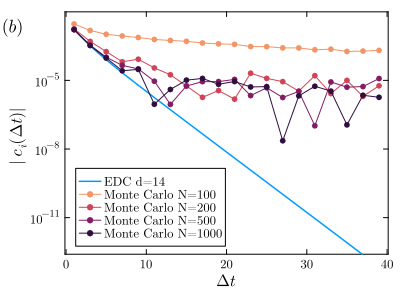

In [18]:
only_even = true
step = only_even + 1
c_bp_plot = c_bp[step:step:end]
pl2 = plot(1:step:maxdist, c_bp_plot, label="EDC d=$d")
plot!(pl2; xlabel=L"\Delta t", size=(400,300),
    # ylabel=L"\langle \sigma_i^t\sigma_i^{t+\Delta t}\rangle - \langle \sigma_i^t\rangle\langle\sigma_i^{t+\Delta t}\rangle")
    ylabel=L"|c_i({\Delta t})|")
t = T - maxdist + 1
Ns_plot = Ns[1:end-1]
cg = cgrad(:matter, length(Ns_plot)+1, categorical=true)
for a in eachindex(Ns_plot)
    N = Ns[a]
    c_mc = c[a]
    c_mc_plot = map(x -> x<0 ? eltype(c_mc)(NaN) : x, c_mc[t,t+step:step:end])
    c_mc_plot = abs.(c_mc[t,t+step:step:end])
    plot!(pl2, 1:step:maxdist, value.(c_mc_plot), c=cg[a+1], msc=cg[a+1],
        label="Monte Carlo N=$N", m=:o, yaxis=:log10, legend=:bottomleft,
        ylims = extrema(c_bp_plot) .* (2.0 .^ (-2,1)), lw=1)
end

# annotate!(pl2, (14, 1e-4, Plots.text(L"(b)", 12)))
annotate!(pl2, (-6.5, 2e-3, Plots.text(L"(b)", 12)))
plot!(pl2, ylims=(5e-13, 5e-3), yticks=10.0 .^ (-11:3:-4))

# plot!(pl2, thickness_scaling=scaling)

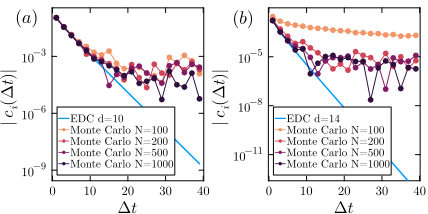

In [19]:
pl = plot(pl1, pl2, 
    size=(600,300)./scaling_single,
    margin=0Plots.mm, 
    # thickness_scaling=scaling,
    )
plot!(pl, legendfontsize=7,
    # left_margin=[0Plots.mm -5Plots.mm],
)

In [20]:
savefig(pl, "plot_outputs/glauber_autocovariance.pdf");

### Magnetization and covariance

In [9]:
@unpack J, h, β, ds, m_bp, r_bp, m_ss, r_ss = load("../data/glauber_para3.jld2")
ds_para, m_bp_para, r_bp_para, m_ss_para, r_ss_para = ds, m_bp, r_bp, m_ss, r_ss
@unpack J, h, β, ds, m_bp, r_bp, m_ss, r_ss = load("../data/glauber_ferro4.jld2")
ds_ferro, m_bp_ferro, r_bp_ferro, m_ss_ferro, r_ss_ferro = ds, m_bp, r_bp, m_ss, r_ss
@assert ds == ds_para

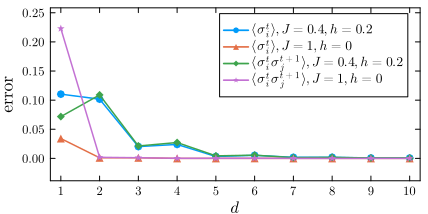

In [10]:
pl = plot(; xlabel=L"d", xticks=ds, ylabel="error")

plot!(pl, ds_para, abs.(abs.(m_bp_para) .- m_ss_para), m=:o, ms=4,
    label=L"\langle \sigma_i^t\rangle, J=0.4, h=0.2")
plot!(pl, ds_ferro, abs.(abs.(m_bp_ferro) .- m_ss_ferro), m=:utriangle,  ms=4,
    label=L"\langle \sigma_i^t\rangle, J=1, h=0")
plot!(pl, ds_para, abs.(r_bp_para .- r_ss_para), m=:diamond,  ms=4,
    label=L"\langle \sigma_i^t\sigma_j^{t+1}\rangle, J=0.4, h=0.2")
plot!(pl, ds_ferro, abs.(r_bp_ferro .- r_ss_ferro), m=:star,  ms=4,
    label=L"\langle \sigma_i^t\sigma_j^{t+1}\rangle, J=1, h=0")

plot!(pl; 
    # thickness_scaling=scaling,
    size = (600,300)./scaling_single,
    ylims = (-0.03, 0.25),
    margin = 0Plots.mm,
    xticks = 1:10,
    legendfontsize=9,
# yscale=:log10
)

In [11]:
savefig(pl, "plot_outputs/glauber_mag_corr.pdf");

## SIS compare meanfield

In [24]:
data = load("../data/sis_meanfield_avg3.jld2")
@unpack T_mf, Ts, λs, ρ, γ, N, nsamples, graph_seed,
    p_dmp_disc_avg, p_ibmf_disc_avg, p_cme_disc_avg,
    p_mc_val, p_bp = data;

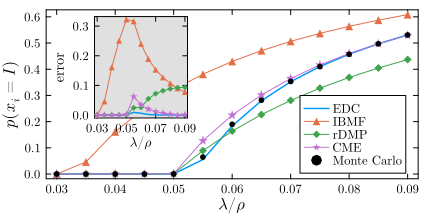

In [25]:
p_mc_ss = [mean(p[end-1000:end]) for p in p_mc_val]
p_dmp_ss = [p[end] for p in p_dmp_disc_avg]
p_cme_ss = [p[end] for p in p_cme_disc_avg]
p_ibmf_ss = [p[end] for p in p_ibmf_disc_avg]
p_bp_ss = p_bp

ms = 4; lw = 1

pl = plot(; xlabel=L"\lambda/\rho", ylabel=L"p(x_i=I)")
plot!(pl, λs, p_bp_ss, label="EDC"; ms, lw=1.5)
plot!(pl, λs, p_ibmf_ss, label="IBMF"; m=:utriangle, ms, lw)
plot!(pl, λs, p_dmp_ss, label="rDMP"; m=:diamond, ms, lw)
plot!(pl, λs, p_cme_ss, label="CME"; m=:star, ms=5, lw)
plot!(pl, λs, p_mc_ss, label="Monte Carlo"; m=:o, ms=3, lw, st=:scatter, c=:black)

plot!(pl, inset=(1, bbox(0.13, 0.04, 0.25, 0.6)), subplot=2)

ms = 3

plot!(pl[2]; xlabel=L"\lambda/\rho", ylabel="error", labelfontsize=9)
plot!(pl[2], λs, abs.(p_bp_ss - p_mc_ss), label=""; lw=1.5)
plot!(pl[2], λs, abs.(p_ibmf_ss - p_mc_ss), label="", m=:utriangle; ms, lw)
plot!(pl[2], λs, abs.(p_dmp_ss - p_mc_ss), label="", m=:diamond; ms, lw)
plot!(pl[2], λs, abs.(p_cme_ss - p_mc_ss), label="", m=:star; ms=4, lw)
plot!(pl[2], xticks=λs[1:4:end])
plot!(pl[2], background_color_inside=:grey88)

plot!(pl, size=(600,300)./scaling_single, legend=:bottomright, margin=0.5Plots.mm,
    legendfontsize=8)

In [26]:
savefig(pl, "plot_outputs/sis_meanfield.pdf");

## SIS continuous time

In [15]:
data = load("../data/sis_continuous4.jld2")
@unpack k, λs, ρ, Δts, ds, p_bp = data
λs = λs[2:4]
p_bp = p_bp[2:4]
k_EDC = k; λs_EDC = λs; ρ_EDC = ρ


data = load("../data/sis_gillespie.jld2")
@unpack k, λs, ρ, ps_gillespie, Ns = data
λs = λs[[1,2,4]]
ps_gillespie = ps_gillespie[[1,2,4]]
@assert k_EDC == k && λs_EDC == λs && ρ_EDC == ρ
ps_gill = last.(ps_gillespie);

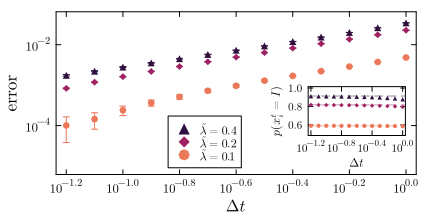

In [16]:
cg = cgrad(:matter, length(λs)+1, categorical=true)

# obtained with ./sampling_error.ipynb
ps_gill = [0.590524372390251, 0.8173073406770637, 0.9129458856216459]
err_gill = [6.281927060550047e-5, 2.2305098718432718e-5, 7.004148996899542e-5]
markers = [:o, :diamond, :utriangle]

pl = plot(; xaxis=:log10, xlabel=L"\Delta t")
for a in reverse(eachindex(λs))
    λ = λs[a]
    plot!(pl, Δts, abs.(p_bp[a] .- ps_gill[a:a]), label=L"\tilde\lambda=%$λ", c=cg[a+1],
        m=markers[a], ms=3.5, st=:scatter, ylabel="error",
        yerr = fill(err_gill[a], length(Δts)), msc=cg[a+1])
end

plot!(pl, size=(600,300)./scaling_single, legend=(0.9, 0.5), 
    ylims=(8e-6, 5e-2), 
    margin=1Plots.mm, xlims=extrema(Δts), xticks=Δts[1:2:end])
plot!(pl, legend=(0.4,0.28),
    yscale=:log10
)

plot!(pl, inset=(1, bbox(0.7, 0.46, 0.27, 0.3)), subplot=2,
    xlabel=L"\Delta t", ylabel=L"p(x_i^t=I)", 
    labelfontsize=8, tickfontsize=7,
    widen=true, bottom_margin=0Plots.mm,
    ylims=(0.5,1), xaxis=:log10, xticks=Δts[1:4:end], yticks=0.6:0.2:1)

for a in reverse(eachindex(λs))
    λ = λs[a]
    plot!(pl[2], Δts, p_bp[a], c=cg[a+1],
        m=markers[a], 
        ms=2.2, st=:scatter)
    hline!(pl[2], ps_gill[a:a], c=cg[a+1], ls=:dash, la=0.5, lw=1)
end

pl

In [17]:
savefig(pl, "plot_outputs/sis_continuous.pdf");

## Glauber nonreciprocal

In [18]:
data = load("../data/glauber_nonreciprocal.jld2")
@unpack kA, kB, nA, nB, JA, JB, h, β,
    m_mcA, m_mcB, m_mc_mean, m_bp, T = data;

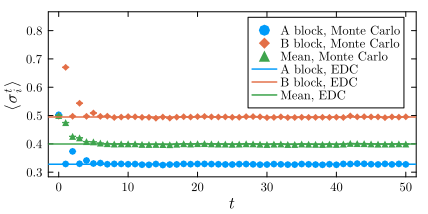

In [19]:
pl_mag = plot(; xlabel=L"t", ylabel=L"\langle \sigma_i^t \rangle")
markersize = 3.5
scatter!(pl_mag, 0:T, m_mcA, label="A block, Monte Carlo"; m=:o, markersize, msc=:auto)
scatter!(pl_mag, 0:T, m_mcB, label="B block, Monte Carlo"; m=:diamond, markersize, msc=:auto)
scatter!(pl_mag, 0:T, m_mc_mean, label="Mean, Monte Carlo"; m=:utriangle, markersize, msc=:auto)

fA = 1/kA / (1/kA + 1/kB)
fB = 1/kB / (1/kA + 1/kB)

lw = 1.5
hline!(pl_mag, m_bp[1:1], label="A block, EDC", c=theme_palette(:auto)[1]; lw)
hline!(pl_mag, m_bp[2:2], label="B block, EDC", c=theme_palette(:auto)[2]; lw)
hline!(pl_mag, [fA*m_bp[1:1]+fB*m_bp[2:2]], label="Mean, EDC", c=theme_palette(:auto)[3]; lw)

plot!(pl_mag; size=(600,300)./scaling_single, margin=1Plots.mm,
    ylims = (0.3, 0.85),
#  legend=:outerbottomright
)

In [20]:
savefig(pl_mag, "plot_outputs/glauber_nonreciprocal.pdf");

## Bond dimension

### Glauber bond dimension

In [29]:
data = load("../data/glauber_bonddims5.jld2")
@unpack Js, h, β, k, tol_magnetiz, m, errs, ds = data;

In [30]:
tols = [8e-3, 2e-2, 1e-1]
tols = [1e-3, 1e-2, 1e-1]
tols = [5e-3]
dmax = [zeros(length(Js)) for _ in tols]
for a in eachindex(tols)
    for i in eachindex(Js)
        b = findfirst(<(tols[a]), errs[i])
        dmax[a][i] = (b===nothing ? NaN : ds[b])
    end
end
dmax

1-element Vector{Vector{Float64}}:
 [2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 7.0, NaN, NaN, NaN, 7.0, 4.0, 4.0, 4.0, 3.0, 2.0, 2.0]

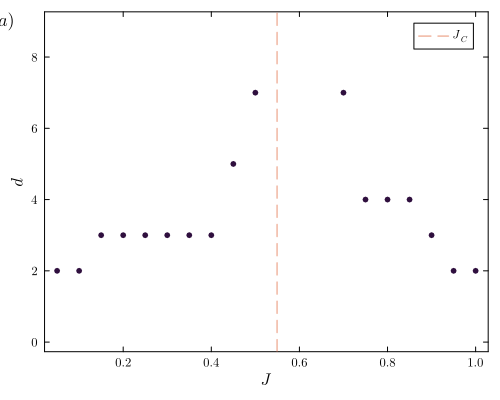

In [31]:
cg = cgrad(:matter, length(dmax)+1, categorical=true)
markers = [:o, :diamond, :utriangle, :star]
pl_bd_glauber = plot(; xlabel=L"J", ylabel=L"d")

for a in eachindex(dmax)
    plot!(pl_bd_glauber, Js, dmax[a], c=cg[a+1], 
        # label=L"\varepsilon=%$(tols[a])", 
        st=:scatter, m=markers[a], ms=3)
end

Jc = log(k/(k-2))/2
vline!(pl_bd_glauber, [Jc], ls=:dash, la=0.5, label=L"J_C")
# plot!(pl_bd_glauber, legend=:topleft)
annotate!(pl_bd_glauber, (-0.07, 9, Plots.text(L"(a)", 12)))
plot!(pl_bd_glauber, ylims=(0, 9))
plot(pl_bd_glauber, size=(500,400))

### SIS bond dimension

In [32]:
data = load("../data/sis_bonddims4.jld2")
@unpack λs, ρ, k, tol_prob, ps, errs, ds, αs = data;

In [33]:
tols = [8e-3, 2e-2, 1e-1]
tols = [1e-3, 1e-2, 1e-1]
tols = [5e-3]
dmax = [zeros(length(λs)) for _ in tols]
for a in eachindex(tols)
    for i in eachindex(λs)
        b = findfirst(<(tols[a]), errs[i])
        dmax[a][i] = (b===nothing ? NaN : ds[b])
    end
end
dmax

1-element Vector{Vector{Float64}}:
 [1.0, 1.0, 1.0, 1.0, 1.0, NaN, NaN, 11.0, 8.0, 7.0, 4.0, 4.0, 4.0]

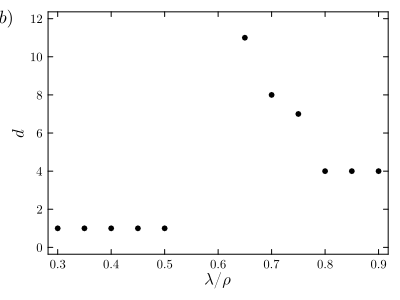

In [34]:
cg = cgrad(:matter, length(dmax)+1, categorical=true)
markers = [:o, :diamond, :utriangle, :star]
pl_bd_sis = plot(; xlabel=L"\lambda/\rho", ylabel=L"d")

for a in eachindex(dmax)
    plot!(pl_bd_sis, λs ./ ρ, dmax[a], 
        c = :black,
        # c=cg[a], 
        # label=L"\varepsilon=%$(tols[a])", 
        st=:scatter, m=markers[a], ms=3)
end

plot(pl_bd_sis, size=(500,500))
annotate!(pl_bd_sis, (0.2, 12, Plots.text(L"(b)", 12)))
plot!(pl_bd_sis, ylims=(0,12), yticks=0:2:12)


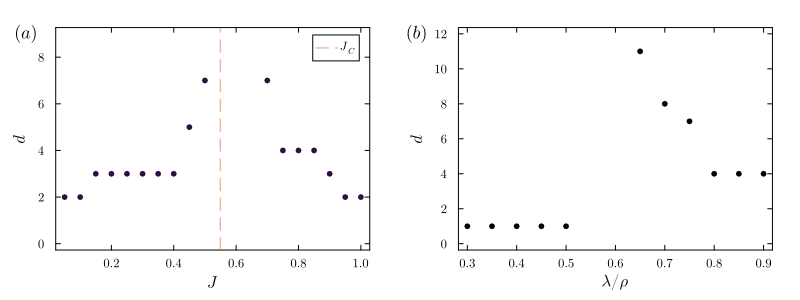

In [40]:
pl = plot(pl_bd_glauber, pl_bd_sis, 
    size=(800,300), margin=5Plots.mm)

In [36]:
savefig(pl, "plot_outputs/bonddims.pdf");

# Extras

## Damped dynamics

In [7]:
data = load("../data/glauber_damped2.jld2")
@unpack k, J, h, β, p0s, ds, r_bp, r_ss = data;

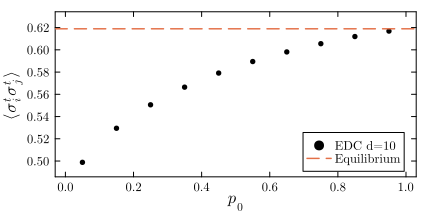

In [18]:
pl_damped = scatter(p0s, r_bp, xlabel=L"p_0", ylabel=L"\langle \sigma_i^t \sigma_j^t\rangle",
    label="EDC d=$(only(unique(ds)))", c=:black,
    xlims=(0,1), xticks=0:0.2:1, ylims=(0.49, 0.63), legend=:bottomright, 
    size=(600,300)./scaling_single, margin=1Plots.mm)
hline!(pl_damped, [r_ss], label="Equilibrium", ls=:dash)

In [19]:
savefig(pl_damped, "plot_outputs/glauber_damped.pdf")

"/home/crotti/EternalDynamicCavity/scripts/plot_outputs/glauber_damped.pdf"

## Correlation times

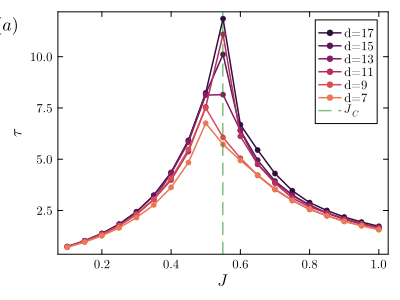

In [35]:
data = load("../data/glauber_correlation_length3.jld2")
@unpack Js, h, k, ds, ls, ls_eigen, ms, ms_exact = data

step = 2
cg = cgrad(:matter, length(ds)+1, categorical=true)

pl_glauber = plot(; xlabel=L"J", ylabel=L"\tau")
for a in reverse(eachindex(ds)[5:step:end])
    plot!(pl_glauber, Js, ls_eigen[a], c=cg[a+1], label="d=$(ds[a])", m=:o)
end
vline!(pl_glauber, [log(3)/2], ls=:dash, la=0.5, c=:green, label=L"J_C")
annotate!(pl_glauber, (-0.07, 11.5, Plots.text(L"(a)", 12)))

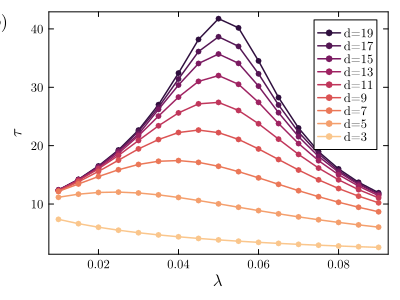

In [32]:
data = load("../data/sis_correlation_length2.jld2")
@unpack λs, ρ, k, ds, ls, ls_eigen, ms = data

step = 1
cg = cgrad(:matter, length(ds)+1, categorical=true)

pl_sis = plot(; xlabel=L"λ", ylabel=L"\tau")
for a in eachindex(ds)[end:-step:1]
    plot!(pl_sis, λs, ls_eigen[a], c=cg[a+1], label="d=$(ds[a])", m=:o)
end
annotate!(pl_sis, (-0.005, 41, Plots.text(L"(b)", 12)))

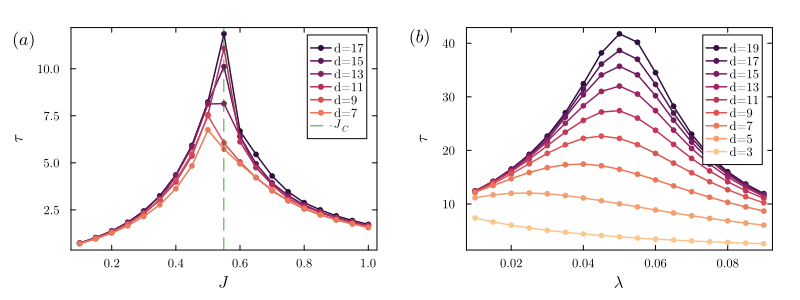

In [33]:
pl_corr = plot(pl_glauber, pl_sis, size=(800,300), 
    margin=5Plots.mm)

In [30]:
savefig(pl_corr, "plot_outputs/correlation_times.pdf");